In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

PART-A

1

Dataset shape: (104651, 28)
First 10 rows of the dataset:


C:\Users\ammad\AppData\Local\Temp\ipykernel_14016\291435725.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("listings_airbnb.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license,price_clean,price_dirty
0,14742560,Classic Artist Loft,97210996539,verified,Josh,Brooklyn,Columbia St,40.68626,-74.00141,United States,...,9.0,6/26/2019,0.38,5.0,1.0,74.0,Please note that we are a no smoking environme...,NaN,616.0,$616.00
1,55508928,Étage au sein d’un duplex à Brooklyn,33249221187,unconfirmed,Sophie & Grégoire,Brooklyn,Clinton Hill,40.68227,-73.96486,United States,...,9.0,6/30/2019,0.89,2.0,1.0,17.0,#NAME?,NaN,1095.0,$1095.00
2,30561537,AMAZING view in ultra luxury midtown apartment!,63109258528,verified,May,Manhattan,Hell's Kitchen,40.75275,-73.99330,United States,...,28.0,2/17/2022,3.64,4.0,6.0,334.0,NaN,NaN,969.0,969.0
3,13914662,Harlem Home Away from Home!,42768739399,verified,Arielle,Manhattan,Harlem,40.82843,-73.94672,United States,...,4.0,6/25/2019,0.16,1.0,1.0,0.0,No pets. No smoking. Please :),NaN,778.0,778.0
4,9063811,Cozy Loft in Flushing,41428819097,verified,Erjon,Queens,Flushing,40.75485,-73.82138,United States,...,1.0,3/25/2016,0.02,1.0,1.0,368.0,No smoking please. Sorry but no pets. No drink...,NaN,815.0,Rs 130400
5,22883462,Real Brooklyn Apt on Pacific and New York,1508400733,unconfirmed,Matt,Brooklyn,Crown Heights,40.67683,-73.94702,United States,...,2.0,2/1/2019,0.32,4.0,1.0,220.0,Check-in time can sometimes be flexible and we...,NaN,172.0,Rs 27520
6,38229670,"Prime, Spacious West Village Apartment",22981236558,verified,Jordan,Manhattan,Greenwich Village,40.73129,-74.00097,United States,...,61.0,4/5/2020,1.95,4.0,1.0,0.0,NaN,NaN,1181.0,$1181.00
7,26509864,"PRIVATE, NEWLY RENOVATED BEDROOM, 10 MINS FROM...",82159107182,unconfirmed,Mina,Queens,Howard Beach,40.66635,-73.85258,United States,...,3.0,7/6/2019,2.14,2.0,4.0,329.0,NaN,NaN,320.0,£256.00
8,55141648,Bright Williamsburg room with huge private ter...,40990182521,unconfirmed,Ben,Brooklyn,Williamsburg,40.71247,-73.94548,United States,...,2.0,9/5/2018,0.18,5.0,1.0,0.0,#NAME?,NaN,986.0,£788.80
9,9103577,Charming Prewar Upper West Side Apt,87433243922,verified,Daniel,Manhattan,Upper West Side,40.79828,-73.97166,United States,...,0.0,NaN,NaN,1.0,1.0,95.0,NaN,NaN,714.0,$714.00



Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104651 entries, 0 to 104650
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              104651 non-null  int64  
 1   NAME                            104397 non-null  object 
 2   host id                         104651 non-null  int64  
 3   host_identity_verified          104354 non-null  object 
 4   host name                       104233 non-null  object 
 5   neighbourhood group             104621 non-null  object 
 6   neighbourhood                   104635 non-null  object 
 7   lat                             104643 non-null  float64
 8   long                            104643 non-null  float64
 9   country                         104110 non-null  object 
 10  country code                    104517 non-null  object 
 11  instant_bookable                104543 non-null  object 

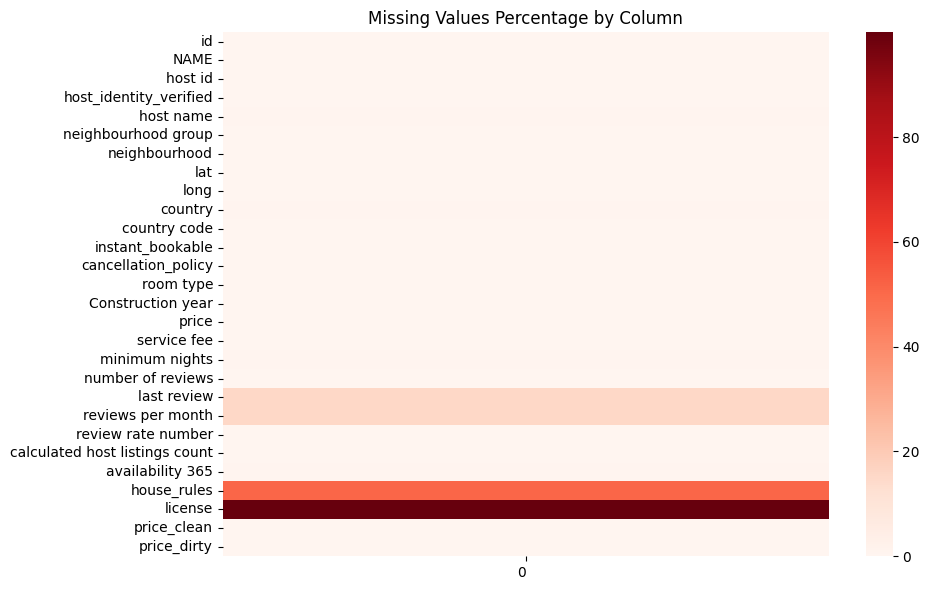

In [249]:
# Load data from a CSV file
df = pd.read_csv("listings_airbnb.csv")

 # Print shape
print(f"Dataset shape: {df.shape}")

# Display the first 10 rows of the dataframe
print("First 10 rows of the dataset:")
display(df.head(10))

#Check for info of columns in the dataframe
print("\nInfo of the dataset:")
print(df.info())

#Percentages of missing values in each column
missing_percentages = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentages)

#visulaize percentages with heamtap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_percentages.to_frame(), cmap="Reds",)
#sns.heatmap(missing_percentages.to_frame(), cmap="Reds", annot=True, cbar=True)
plt.title("Missing Values Percentage by Column")
plt.yticks(rotation=0)
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()


2

In [250]:

display(df[["price_dirty","price","price_clean"]].sample(10))
#as price_clean is the actual price and is in float so removing others 2
df.drop(columns=['price_dirty',"price"], inplace=True)

,price_dirty,price,price_clean
8681,Rs 83360,$521,521.0
50253,Rs 165600,"$1,035",1035.0
98406,737.0,$737,737.0
54793,£724.00,$905,905.0
60482,Rs 62720,$392,392.0
82803,£852.00,"$1,065",1065.0
9214,Rs 62240,$389,389.0
96890,1117.0,"$1,117",1117.0
5454,722.0,$722,722.0
28078,233.0,$233,233.0


In [251]:
#date_formatting
#rint("\nSample 'last review' values before conversion:")
#display(df["last review"].sample(10))

df['last review_date'] = pd.to_datetime(df['last review'], errors='coerce', dayfirst=False)

print("\nSample 'last review' values after conversion:")
display(df[["last review_date","last review"]].sample(10))

df.drop(columns=['last review'], inplace=True)


Sample 'last review' values after conversion:


,last review_date,last review
16467,NaT,NaN
37934,2022-01-06,1/6/2022
2492,2017-05-07,5/7/2017
1917,2021-11-14,11/14/2021
38207,2022-01-01,1/1/2022
55727,2019-07-02,7/2/2019
28646,2019-06-25,6/25/2019
91180,2019-07-03,7/3/2019
80801,2019-05-31,5/31/2019
75660,2019-06-10,6/10/2019


In [252]:
import re

#this method will help us to identify the pattern used in the currency format
def extract_currency_pattern(x):
    return re.sub(r"\d", "0", str(x))  # replace digits with 0 to see format

patterns = df["service fee"].apply(extract_currency_pattern)
print(patterns.value_counts())

#so shown that the format used in it is $0.00
#now we have to convert service fee to proper float values

df["service fee_cleaned"] = (
    df["service fee"]
    .str.replace(r"[^\d.,]", "", regex=True)   # remove symbols & letters
    .str.replace(",", "")                      # remove thousand separators
)

df["service fee_cleaned"] = pd.to_numeric(df["service fee_cleaned"], errors="coerce")

display(df[["service fee","service fee_cleaned"]].sample(10))

df.drop(columns=["service fee"], inplace=True)


service fee
$000     63824
$00      40551
nan        276
Name: count, dtype: int64


,service fee,service fee_cleaned
15887,$20,20.0
85714,$94,94.0
19588,$50,50.0
13994,$124,124.0
103351,$145,145.0
47202,$92,92.0
21146,$212,212.0
77088,$53,53.0
52764,$206,206.0
65679,$39,39.0


In [253]:
#text casing
cols = df.select_dtypes(include=['object']).columns

for col in cols:
    df[col] = df[col].astype(str).str.strip().str.upper().replace(["nan","NAN", "NaN", "None", "NONE"], pd.NA)
   
print("\nSample text columns after casing:")
display(df[cols].sample(10))



Sample text columns after casing:


,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,country,country code,instant_bookable,cancellation_policy,room type,house_rules,license
98031,LARGE PRIVATE BEDROOM IN PRIME WEST VILLAGE!,VERIFIED,LISA,MANHATTAN,WEST VILLAGE,UNITED STATES,US,TRUE,MODERATE,PRIVATE ROOM,1) NO SMOKING IN PROPERTY!!! 2) DO NOT SLAM D...,<NA>
63145,ROOM IN A LOFT IN SOHO/NOLITA,VERIFIED,MAEVA,MANHATTAN,SOHO,UNITED STATES,US,TRUE,MODERATE,PRIVATE ROOM,WE NEED TO KNOW YOUR ARRIVAL TIME ALMOST 2 DAY...,<NA>
28134,HOTEL ROOM KING/QUEEN AT WYNDHAM MIDTOWN 45 RE...,UNCONFIRMED,CHAYLA,MANHATTAN,MIDTOWN,UNITED STATES,US,TRUE,FLEXIBLE,PRIVATE ROOM,<NA>,<NA>
72958,BRONX 167TH GRAND CONCOURSE,UNCONFIRMED,DANIEL,BRONX,CONCOURSE VILLAGE,UNITED STATES,US,TRUE,STRICT,PRIVATE ROOM,- NO PARTIES OR EVENTS. -NO SMOKING INSIDE. YO...,<NA>
101830,"PRIVATE BEDROOM, 10 MINUTES TO LOWER MANHATTAN",VERIFIED,DAVID,BROOKLYN,WILLIAMSBURG,UNITED STATES,US,FALSE,MODERATE,PRIVATE ROOM,<NA>,<NA>
11769,BEAUTIFUL BROOKLYN PRIVATE ROOM,VERIFIED,ANTHONY,BROOKLYN,FLATBUSH,UNITED STATES,US,TRUE,MODERATE,PRIVATE ROOM,<NA>,<NA>
48968,WASHER&DRYER - 6 SUBWAY STOPS TO NYC / 15 MIN ...,UNCONFIRMED,FRANCES,BROOKLYN,BEDFORD-STUYVESANT,UNITED STATES,US,TRUE,FLEXIBLE,ENTIRE HOME/APT,PLEASE NO LOUD MUSIC OR SMOKING IN THE COURTYA...,<NA>
36414,(D) BRAND NEW APTO JUST FEW STEPS FROM THE TRAIN,UNCONFIRMED,ROSANA,BROOKLYN,BEDFORD-STUYVESANT,UNITED STATES,US,TRUE,STRICT,PRIVATE ROOM,PLEASE NO SMOKING OR PETS IN THE LOFT!,<NA>
9498,"BEAUTIFUL ROOM IN QUEENS, CLOSE TO SUBWAY STATION",UNCONFIRMED,LISE,QUEENS,WOODHAVEN,UNITED STATES,US,FALSE,FLEXIBLE,PRIVATE ROOM,<NA>,<NA>
12645,LARGE SUNNY WILLIAMSBURG APT NEAR L TRAIN #2`,VERIFIED,CURTIS,BROOKLYN,WILLIAMSBURG,UNITED STATES,US,TRUE,STRICT,PRIVATE ROOM,"NO DRUGS, NO SMOKING, NO PETS (OUR DOG IS ENOU...",<NA>


3

In [254]:
for col in df.columns:
    print(df[col].apply(lambda x: type(x)).value_counts())
    print("-----")

id
<class 'int'>    104651
Name: count, dtype: int64
-----
NAME
<class 'str'>                            104397
<class 'pandas._libs.missing.NAType'>       254
Name: count, dtype: int64
-----
host id
<class 'int'>    104651
Name: count, dtype: int64
-----
host_identity_verified
<class 'str'>                            104354
<class 'pandas._libs.missing.NAType'>       297
Name: count, dtype: int64
-----
host name
<class 'str'>                            104225
<class 'pandas._libs.missing.NAType'>       426
Name: count, dtype: int64
-----
neighbourhood group
<class 'str'>                            104621
<class 'pandas._libs.missing.NAType'>        30
Name: count, dtype: int64
-----
neighbourhood
<class 'str'>                            104635
<class 'pandas._libs.missing.NAType'>        16
Name: count, dtype: int64
-----
lat
<class 'float'>    104651
Name: count, dtype: int64
-----
long
<class 'float'>    104651
Name: count, dtype: int64
-----
country
<class 'str'>                   

In [255]:
for col in df.columns:
    print(col ," : " , len(df[col].value_counts(dropna=False)), df[col].dtype)

id  :  102058 int64
NAME  :  60663 object
host id  :  102057 int64
host_identity_verified  :  3 object
host name  :  13157 object
neighbourhood group  :  8 object
neighbourhood  :  225 object
lat  :  21992 float64
long  :  17775 float64
country  :  2 object
country code  :  2 object
instant_bookable  :  3 object
cancellation_policy  :  4 object
room type  :  4 object
Construction year  :  21 float64
minimum nights  :  154 float64
number of reviews  :  477 float64
reviews per month  :  1017 float64
review rate number  :  6 float64
calculated host listings count  :  79 float64
availability 365  :  439 float64
house_rules  :  1947 object
license  :  2 object
price_clean  :  1152 float64
last review_date  :  2478 datetime64[ns]
service fee_cleaned  :  232 float64


4

In [256]:
#Percentages of missing values in each column
print("before")
missing_percentages = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentages)

for index in missing_percentages.index:
    if missing_percentages[index]>40:
       df=df.drop(columns=[index])
       
for col in df.select_dtypes(include=['object']).columns:
    df[col]=df[col].fillna(df[col].mode()[0])


for col in df.select_dtypes(include=['number']).columns:
    skewness=df[col].skew()
    if abs(skewness) < 0.5:
        #mean imputation because skewness is less
        df[col] = df[col].fillna(df[col].mean())
    else:
        #median imputation because skewness is more
        df[col] = df[col].fillna(df[col].median())


df["last review_date"]=df["last review_date"].fillna(df["last review_date"].median())

#Percentages of missing values in each column
print("after")
missing_percentages = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentages)


before

Percentage of missing values in each column:
id                                 0.000000
NAME                               0.242711
host id                            0.000000
host_identity_verified             0.283800
host name                          0.407067
neighbourhood group                0.028667
neighbourhood                      0.015289
lat                                0.007644
long                               0.007644
country                            0.516956
country code                       0.128045
instant_bookable                   0.103200
cancellation_policy                0.074533
room type                          0.000000
Construction year                  0.207356
minimum nights                     0.398467
number of reviews                  0.177734
reviews per month                 15.472380
review rate number                 0.318200
calculated host listings count     0.310556
availability 365                   0.437645
house_rules            

5

In [257]:
list_happiness_csvs=["2015.csv","2016.csv","2017.csv","2018.csv","2019.csv"]
df_list = []
for csv in list_happiness_csvs:
    temp= pd.read_csv(csv)
    temp["year"] = csv.split(".")[0]
    #print(df.columns)
    df_list.append(temp)

happiness_df = pd.concat(df_list, ignore_index=True,axis=0)

display(happiness_df.sample(10))

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
194,Spain,Western Europe,37.0,6.361,NaN,1.34253,1.129450,0.87896,0.375450,0.06137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,121.0,Burkina Faso,4.424,0.314,1.097,0.254,0.312,0.128
319,Finland,NaN,NaN,NaN,NaN,NaN,1.540247,NaN,0.617951,NaN,...,0.382612,2.430182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,88.0,Tajikistan,5.199,0.474,1.166,0.598,0.292,0.034
22,Venezuela,Latin America and Caribbean,23.0,6.810,0.06476,1.04424,1.255960,0.72052,0.429080,0.11069,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.0,Turkmenistan,5.636,1.016,1.533,0.517,0.417,0.037
675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50.0,Ecuador,6.028,0.912,1.312,0.868,0.498,0.087
165,New Zealand,Australia and New Zealand,8.0,7.334,NaN,1.36066,1.172780,0.83096,0.581470,0.41904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,Libya,Middle East and Northern Africa,67.0,5.615,NaN,1.06688,0.950760,0.52304,0.406720,0.10339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
423,Albania,NaN,NaN,NaN,NaN,NaN,0.803685,NaN,0.381499,NaN,...,0.039864,1.490442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


B

In [258]:
from scipy import stats
import pprint

columns_to_analyze = ['price_clean', 'service fee_cleaned', 'minimum nights']

print("Summary Statistics:")
print(df[columns_to_analyze].describe())
print("Skewness:")
print(df[columns_to_analyze].skew())

Summary Statistics:
         price_clean  service fee_cleaned  minimum nights
count  104651.000000        104651.000000   104651.000000
mean      625.318342           125.030860        8.106019
std       331.206975            66.225902       30.272819
min        50.000000            10.000000    -1223.000000
25%       340.500000            68.000000        2.000000
50%       625.318342           125.000000        3.000000
75%       912.000000           182.000000        5.000000
max      1200.000000           240.000000     5645.000000
Skewness:
price_clean             0.001019
service fee_cleaned     0.001665
minimum nights         87.068875
dtype: float64


1

for minimum rights we be using z-score while for minimum nights we would be using IQR

In [259]:

columns_to_analyze_zscore = ['price_clean', 'service fee_cleaned']

def detect_outliers_zscore(data, column, threshold=3):
    # Remove NaN values for calculation
    clean_data = data[column].dropna()
    
    z_scores = np.abs(stats.zscore(clean_data))
    
    #for i in z_scores:
        #if i > threshold:
            #print(i)
            
    z_score_mask= z_scores > threshold
    outlier_indices = clean_data[z_score_mask].index
    outliers = data.iloc[outlier_indices]  
    return outliers, threshold

zscore_results = {}
for col in columns_to_analyze_zscore:
    outliers, threshold = detect_outliers_zscore(df, col, threshold=3)
    zscore_results[col] = {
        'threshold': threshold,
        'count': len(outliers)
    }

pprint.pprint(zscore_results)

#Hence no outliers for price_clean and service fee_cleaned


{'price_clean': {'count': 0, 'threshold': 3},
 'service fee_cleaned': {'count': 0, 'threshold': 3}}


In [260]:
columns_to_analyze_iqr = ['minimum nights']

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    return outliers, lower_bound, upper_bound, Q1, Q3, IQR

iqr_results = {}
for col in columns_to_analyze_iqr:
    outliers, lower, upper, q1, q3, iqr = detect_outliers_iqr(df, col)
    iqr_results[col] = {
        'lower_bound': lower,
        'upper_bound': upper,
        'Q1': q1,
        'Q3': q3,
        'IQR': iqr,
        'count': len(outliers)
    }
    
pprint.pprint(iqr_results)



{'minimum nights': {'IQR': np.float64(3.0),
                    'Q1': np.float64(2.0),
                    'Q3': np.float64(5.0),
                    'count': 18750,
                    'lower_bound': np.float64(-2.5),
                    'upper_bound': np.float64(9.5)}}


2

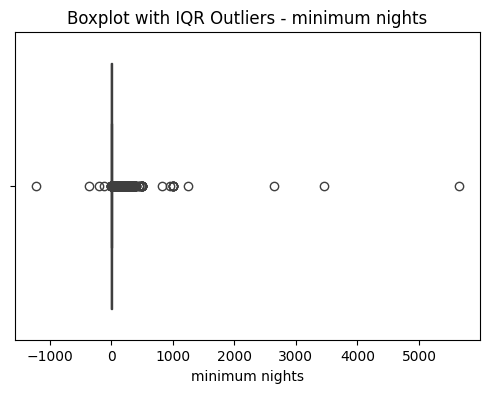

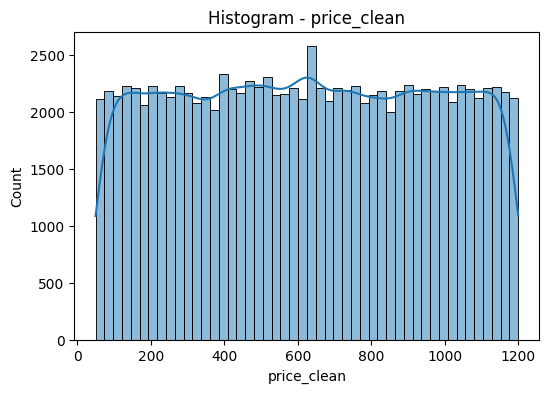

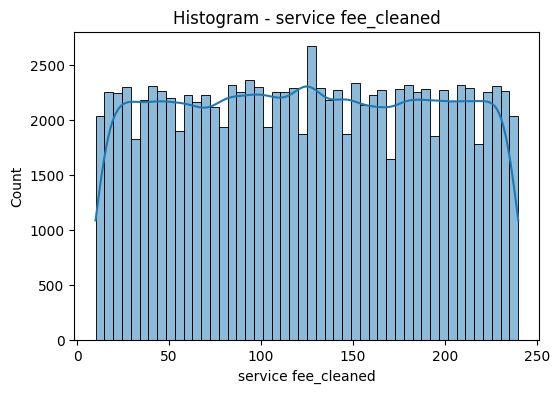

In [261]:
for col in columns_to_analyze_iqr:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot with IQR Outliers - {col}')
    plt.show()
    
for col in columns_to_analyze_zscore:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram - {col}')
    plt.show()

3

As "price_clean and service fee_cleaned" have no outliers so no tirmming or capping
But "minimum nights" has many outliers so trimming is not a good option, we would rather be using capping for it

After Capping Outliers in 'minimum nights':


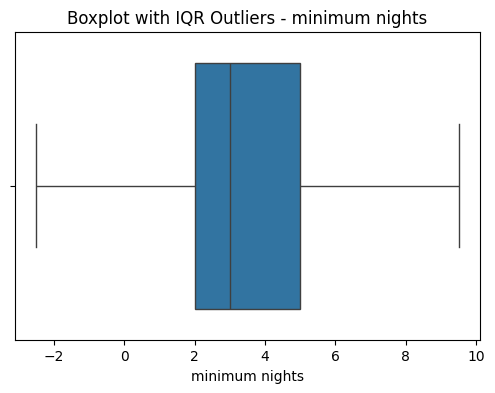

In [262]:
l_bound = iqr_results['minimum nights']['lower_bound']
u_bound = iqr_results['minimum nights']['upper_bound']
df['minimum nights'] = df['minimum nights'].clip(lower=l_bound, upper=u_bound)

print("After Capping Outliers in 'minimum nights':")
for col in columns_to_analyze_iqr:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot with IQR Outliers - {col}')
    plt.show()

PART C

1

In [263]:
#aggregation on country level
agg_df=df.groupby("country").agg( avg_price=('price_clean','mean'), avg_reviews=('review rate number','mean')  ).reset_index()
print(agg_df)


#doing it beacuse in airbnb dataset i did it for text casing
happiness_df["Country"]=happiness_df["Country"].astype(str).str.strip().str.upper().replace(["NAN","NaN","nan","None","NONE"], pd.NA)
#display(happiness_df.sample(10))
    
    
#merging two datasets on country
merged_df = pd.merge(agg_df, happiness_df, left_on='country', right_on='Country', how='inner')
    
display(merged_df)
    

         country   avg_price  avg_reviews
0  UNITED STATES  625.318342     3.279702


,country,avg_price,avg_reviews,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,...,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,UNITED STATES,625.318342,3.279702,UNITED STATES,North America,15.0,7.119,0.03839,1.39451,1.247110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UNITED STATES,625.318342,3.279702,UNITED STATES,North America,13.0,7.104,NaN,1.50796,1.047820,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,UNITED STATES,625.318342,3.279702,UNITED STATES,NaN,NaN,NaN,NaN,NaN,1.419921,...,0.135639,2.218113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2

So no correlation found between average price and happiness score

In [264]:
print(merged_df[["avg_price","Happiness Score"]].corr())

#So no correlation found between average price and happiness score
#also indicates that avg_price has not variance at all


                 avg_price  Happiness Score
avg_price              NaN              NaN
Happiness Score        NaN              1.0


3

In [265]:
print(df.select_dtypes(include=['number']).columns)

Index(['id', 'host id', 'lat', 'long', 'Construction year', 'minimum nights',
       'number of reviews', 'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365', 'price_clean',
       'service fee_cleaned'],
      dtype='object')


In [266]:
from sklearn.preprocessing import StandardScaler
#nomrally standard scalar is used, because we have already terminated outliers and min max is mostly useful for neural networks 
numeric_features = df.select_dtypes(include=['number']).columns
numeric_features=numeric_features.drop(["id","host id"]) 
for col in numeric_features:
    scaler = StandardScaler()
    df[col] = scaler.fit_transform(df[[col]])
    
    
display(df.sample(10))

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,price_clean,last review_date,service fee_cleaned
8545,53526723,THE CROWN MASTER,9976764991,VERIFIED,ALLIOT,BROOKLYN,CROWN HEIGHTS,-0.961907,0.181505,UNITED STATES,...,-0.604748,0.380097,-0.515100,-0.694683,0.561456,-0.183840,1.649374,0.204350,2018-08-29,0.210933
25851,49414849,"MODERN 3 BR HOME, 4 BLOCKS FROM PUBLIC TRANSPORT!",84998772250,UNCONFIRMED,ANN,BROOKLYN,EAST FLATBUSH,-1.295769,0.280831,UNITED STATES,...,-0.951935,-0.277133,-0.494853,-0.583696,-0.997499,-0.214880,-1.043241,-0.085501,2018-12-09,-0.091065
56092,23947744,CHARMING 1 BEDROOM FOR FEMALE GUEST,60236915714,VERIFIED,SHALINI,BROOKLYN,PROSPECT HEIGHTS,-0.964949,-0.334300,UNITED STATES,...,-1.646311,-0.605748,-0.413867,0.137716,0.561456,-0.214880,-0.577211,-0.997322,2019-07-02,-0.997060
7318,35646010,LOVELY ONE BEDROOM SUITE IN MIDTOWN MANHATTAN,54297781846,UNCONFIRMED,STANLEY,MANHATTAN,MURRAY HILL,0.367454,-0.554754,UNITED STATES,...,0.089628,1.858866,-0.494853,-0.725512,1.340933,2.330407,1.183345,0.660260,2021-11-01,0.663930
66519,10626268,5 STAR EAST-AFRICAN SAFARI EXPERIENCE + CONCIERGE,66731060398,UNCONFIRMED,MUFARO,MANHATTAN,HARLEM,1.818481,0.089448,UNITED STATES,...,-1.299123,0.380097,-0.555593,-0.330893,1.340933,-0.214880,-1.043241,-0.230426,2019-06-14,-0.226965
40663,8783243,BROOKLYN FOR LIFE - PARK SLOPE,52051882699,VERIFIED,DOUGLAS,BROOKLYN,SOUTH SLOPE,-1.160149,-0.636515,UNITED STATES,...,-0.778342,-0.605748,1.712023,0.902290,1.340933,-0.214880,0.887453,1.415079,2019-06-30,1.418925
104217,52833586,COZY STUDIO APARTMENT,39012403113,VERIFIED,ENDAZSIA,BROOKLYN,BEDFORD-STUYVESANT,-0.816089,0.020808,UNITED STATES,...,1.131191,-0.934364,-0.130415,0.291864,-0.218022,-0.183840,-1.043241,0.747819,2019-06-21,0.754529
31697,32327792,CUTE AND COZY PAD IN THE MIDDLE OF TOONTOWN,4610752917,UNCONFIRMED,FUQUAN,MANHATTAN,EAST VILLAGE,-0.089145,-0.736043,UNITED STATES,...,0.263222,0.380097,-0.211401,0.298030,-0.997499,-0.214880,-0.370087,-1.284153,2022-01-22,-1.283958
11108,55548693,LARGE HARLEM 3 BED 2 BATH,85363397011,VERIFIED,GLENIS,MANHATTAN,HARLEM,1.510384,0.001428,UNITED STATES,...,0.957597,-0.605748,-0.515100,-0.663853,0.561456,-0.214880,-1.043241,1.729083,2019-01-01,1.736023
37474,19991619,MASSIVE ROOM SECONDS FROM BUSHWICK GRAFFITI,17622793040,VERIFIED,MICHAEL,BROOKLYN,WILLIAMSBURG,-0.401715,0.450209,UNITED STATES,...,0.957597,-0.934364,-0.515100,-0.515871,-0.218022,-0.214880,-1.043241,1.327520,2019-02-24,1.328326


4

In [267]:
#one hot encoding for room-type
room_type_dummies = pd.get_dummies(df["room type"], prefix='room_type')
df=pd.concat([df, room_type_dummies], axis=1)


from sklearn.preprocessing import LabelEncoder
# Initialize
le = LabelEncoder()
# Fit the encoder and transform in one step
df["neighbourhood group"] = le.fit_transform(df["neighbourhood group"])  # Note the single brackets


5
listing_age = 2025 - Construction_year  # or current year
annual_revenue = price_clean * availability_365 #annual revinue


In [268]:
current_year = 2025

df["listing_age"] = current_year - df["Construction year"]
df["annual_revenue"] = df["price_clean"] * df["availability 365"]



PART-D

1

In [ ]:
print("Number of duplicate rows before removal:")
print(df.duplicated().sum())

df = df.drop_duplicates()

print("Number of duplicate rows after removal:")
print(df.duplicated().sum())


from fuzzywuzzy import fuzz  # Import fuzzywuzzy
import itertools
import time

# We will compare listings that are at least 85% similar in name
# fuzzywuzzy returns scores as integers from 0-100
NAME_THRESHOLD = 85

# We will check if their (scaled) coordinates are almost identical
# This value may need to be adjusted if your coords aren't scaled
LOCATION_THRESHOLD_DEG = 0.001 
# ---------------------

def find_and_remove_duplicates(df):
    """
    Finds and removes near-duplicate listings from the DataFrame.
    
    Strategy:
    1. Blocks by 'host id' to only compare listings from the same host.
    2. Uses fuzzywuzzy.fuzz.token_set_ratio for robust fuzzy name matching.
    3. Confirms duplicates by checking for near-identical lat/long.
    4. Keeps the listing with more reviews when a duplicate pair is found.
    """
    
    # Set to store the DataFrame *indices* of rows to remove
    indices_to_remove = set()

    # Group by host ID, as duplicates are almost always from the same host
    grouped_by_host = df.groupby('host id')
    
    total_groups = len(grouped_by_host)
    print(f"Processing {total_groups} host groups using fuzzywuzzy...")
    
    start_time = time.time()

    # Iterate over each host's group of listings
    for i, (host_id, group_df) in enumerate(grouped_by_host):
        
        # Only process hosts with more than one listing
        if len(group_df) > 1:
            
            # Create all unique pairs of listings (by index) for this host
            for idx_a, idx_b in itertools.combinations(group_df.index, 2):
                
                # If either is already marked for removal, skip this pair
                if idx_a in indices_to_remove or idx_b in indices_to_remove:
                    continue

                # Get the two rows (series)
                try:
                    row_a = df.loc[idx_a]
                    row_b = df.loc[idx_b]
                except KeyError:
                    # This can happen if an index was already dropped
                    continue

                # --- 1. Check Name Similarity (Using fuzzywuzzy) ---
                # Convert names to string and lowercase to ensure comparison
                name_a = str(row_a.get('NAME', '')).lower()
                name_b = str(row_b.get('NAME', '')).lower()
                
                # Use fuzz.token_set_ratio for robust matching
                # This ignores word order and is great for titles
                name_score = fuzz.token_set_ratio(name_a, name_b)
                print("name_score:",name_score)
                if name_score > NAME_THRESHOLD:
                    
                    print("ammad")
                    
                    
                    # --- 2. Check Location Proximity (if name is similar) ---
                    lat_diff = abs(row_a['lat'] - row_b['lat'])
                    long_diff = abs(row_a['long'] - row_b['long'])

                    if lat_diff < LOCATION_THRESHOLD_DEG and long_diff < LOCATION_THRESHOLD_DEG:
                        # This is a confirmed duplicate.
                        
                        # --- 3. Decide which to remove ---
                        # We keep the one with MORE reviews.
                        # We remove the one with FEWER reviews.
                        idx_to_remove = -1
                        if row_a['number of reviews'] > row_b['number of reviews']:
                            idx_to_remove = idx_b # Keep A, remove B
                        else:
                            idx_to_remove = idx_a # Keep B, remove A (also handles ties)
                            
                        indices_to_remove.add(idx_to_remove)

        # Print progress
        if (i + 1) % 10000 == 0:
            print(f"  ...processed {i+1} / {total_groups} groups.")

    # --- Final Step: Removal and Saving ---
    end_time = time.time()
    print(f"\nProcessing complete in {end_time - start_time:.2f} seconds.")
    print(f"Total near-duplicates found: {len(indices_to_remove)}")

    # Create the deduplicated DataFrame by dropping all marked indices
    df_deduplicated = df.drop(index=list(indices_to_remove)).reset_index(drop=True)
    
    return df_deduplicated



print("Finding and removing near-duplicate listings...")

print(f"duplicated DataFrame shape: {df.shape}")
df = find_and_remove_duplicates(df)
print(f"Deduplicated DataFrame shape: {df.shape}")


    



Number of duplicate rows before removal:
0
Number of duplicate rows after removal:
0
Finding and removing near-duplicate listings...
duplicated DataFrame shape: (102058, 30)
Processing 102057 host groups using fuzzywuzzy...
  ...processed 10000 / 102057 groups.
  ...processed 20000 / 102057 groups.
  ...processed 30000 / 102057 groups.
name_score: 44
  ...processed 40000 / 102057 groups.
  ...processed 50000 / 102057 groups.
  ...processed 60000 / 102057 groups.
  ...processed 70000 / 102057 groups.
  ...processed 80000 / 102057 groups.
  ...processed 90000 / 102057 groups.
  ...processed 100000 / 102057 groups.

Processing complete in 1.67 seconds.
Total near-duplicates found: 0
Deduplicated DataFrame shape: (102058, 30)


2
Have done it already in Part-A

3

In [270]:
numeric_airbnb_df=df.select_dtypes(include=['number'])

display(numeric_airbnb_df.corr())

,id,host id,neighbourhood group,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,price_clean,service fee_cleaned,listing_age,annual_revenue
id,1.000000,-0.001189,0.008733,-0.008599,0.042491,0.000993,0.026744,-0.042019,0.040655,0.036489,0.023749,-0.138050,0.006802,0.007158,-0.000993,0.000020
host id,-0.001189,1.000000,0.002771,0.000389,-0.008801,0.004721,-0.000062,-0.004795,-0.002417,0.003603,0.001667,-0.002184,0.003620,0.003413,-0.004721,0.005678
neighbourhood group,0.008733,0.002771,1.000000,0.298330,0.022019,-0.005184,0.028258,-0.005425,0.030110,0.012207,0.112932,0.051711,-0.001380,-0.000934,0.005184,-0.003220
lat,-0.008599,0.000389,0.298330,1.000000,0.074427,0.005484,0.036726,-0.025162,-0.021968,-0.003763,0.032201,-0.005003,-0.005570,-0.005555,-0.005484,0.001566
long,0.042491,-0.008801,0.022019,0.074427,1.000000,0.001478,-0.109561,0.069031,0.117201,0.015226,-0.104109,0.058082,0.003354,0.003199,-0.001478,0.000998
Construction year,0.000993,0.004721,-0.005184,0.005484,0.001478,1.000000,-0.003146,0.001859,0.003753,0.005017,-0.002605,-0.008189,-0.003713,-0.003389,-1.000000,0.005167
minimum nights,0.026744,-0.000062,0.028258,0.036726,-0.109561,-0.003146,1.000000,-0.160095,-0.284645,0.009124,0.199836,0.084038,-0.003147,-0.003200,0.003146,-0.003384
number of reviews,-0.042019,-0.004795,-0.005425,-0.025162,0.069031,0.001859,-0.160095,1.000000,0.601395,-0.018196,-0.080590,0.098612,0.005151,0.005044,-0.001859,0.009203
reviews per month,0.040655,-0.002417,0.030110,-0.021968,0.117201,0.003753,-0.284645,0.601395,1.000000,0.034175,-0.030336,0.072772,0.004434,0.004310,-0.003753,0.006801
review rate number,0.036489,0.003603,0.012207,-0.003763,0.015226,0.005017,0.009124,-0.018196,0.034175,1.000000,0.024352,-0.006252,-0.004634,-0.004448,-0.005017,-0.001001


In [271]:
4

4

In [272]:
categorical_df=df.select_dtypes(include=['object'])

display(categorical_df.sample(10))

for col in categorical_df.columns:
    print(f"Value counts for column: {col}")
    print(categorical_df[col].value_counts())
    print("-----")

,NAME,host_identity_verified,host name,neighbourhood,country,country code,instant_bookable,cancellation_policy,room type
10769,"WINDSOR TERRACE SPACIOUS, LOVELY 1 BEDROOM",VERIFIED,ANDREA,WINDSOR TERRACE,UNITED STATES,US,TRUE,MODERATE,ENTIRE HOME/APT
101863,1BEDROOM WITH PRIVATE BATHROOM,VERIFIED,APRIL,EAST ELMHURST,UNITED STATES,US,TRUE,STRICT,PRIVATE ROOM
100554,WILLIAMSBURG PENTHOUSE WITH PRIVATE ROOF CABANA,VERIFIED,ANDERSON,WILLIAMSBURG,UNITED STATES,US,TRUE,FLEXIBLE,ENTIRE HOME/APT
89747,SONDER | STOCK EXCHANGE | PEACEFUL 1BR + SOFA BED,VERIFIED,SONDER (NYC),FINANCIAL DISTRICT,UNITED STATES,US,FALSE,MODERATE,ENTIRE HOME/APT
21757,"SUNNY , COZY, AND SPACIOUS MANHATTAN APARTMENT",UNCONFIRMED,N ASSOCIATES,UPPER EAST SIDE,UNITED STATES,US,FALSE,FLEXIBLE,ENTIRE HOME/APT
90807,DESIGNER APARTMENT IN HARLEM,VERIFIED,GÒN,HARLEM,UNITED STATES,US,FALSE,FLEXIBLE,ENTIRE HOME/APT
6460,SUNNY BEDROOM IN THE HEART OF BUSHWICK,VERIFIED,JERMAINE,BUSHWICK,UNITED STATES,US,TRUE,MODERATE,PRIVATE ROOM
81250,COZY STUDIO IN HISTORIC CLINTON HILL NEAR TRAINS,VERIFIED,ASHLEY,CLINTON HILL,UNITED STATES,US,FALSE,STRICT,ENTIRE HOME/APT
20064,ONCE UPON A BROWNSTONE,VERIFIED,ALIE AND PAT,BEDFORD-STUYVESANT,UNITED STATES,US,TRUE,MODERATE,ENTIRE HOME/APT
43888,TRIPLEX PENTHOUSE IN NEW YORK,VERIFIED,PARESH,WILLIAMSBURG,UNITED STATES,US,TRUE,STRICT,ENTIRE HOME/APT


Value counts for column: NAME
NAME
HOME AWAY FROM HOME                                  314
PRIVATE ROOM                                          44
HILLSIDE HOTEL                                        30
WATER VIEW KING BED HOTEL ROOM                        30
PRIVATE ROOM IN BROOKLYN                              29
                                                    ... 
NEWLY RENOVATED MODERN & PRIVATE STUDIO APARTMENT      1
BRIGHT, SPACIOUS AND COMFORTABLE WITH OPEN VIEW        1
PRIVATE BED, BATH & PATIO IN PRIME WILLIAMSBURG !      1
TIDY 1 BEDROOM NEAR NYU                                1
MEDROOM-444-2                                          1
Name: count, Length: 60662, dtype: int64
-----
Value counts for column: host_identity_verified
host_identity_verified
UNCONFIRMED    51233
VERIFIED       50825
Name: count, dtype: int64
-----
Value counts for column: host name
host name
MICHAEL         1290
DAVID            761
JOHN             577
ALEX             543
SONDER (NYC)     

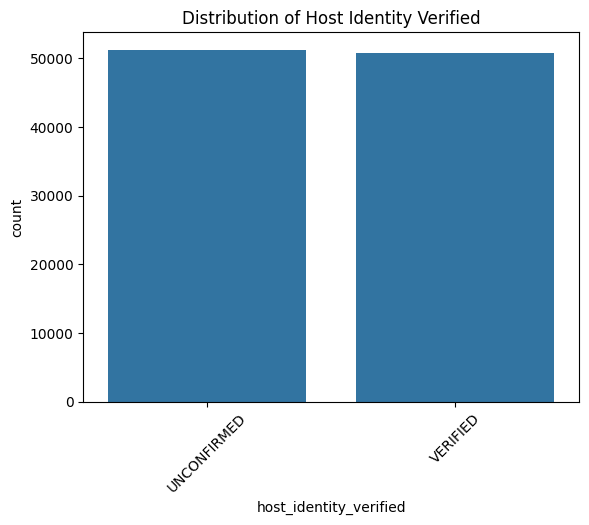

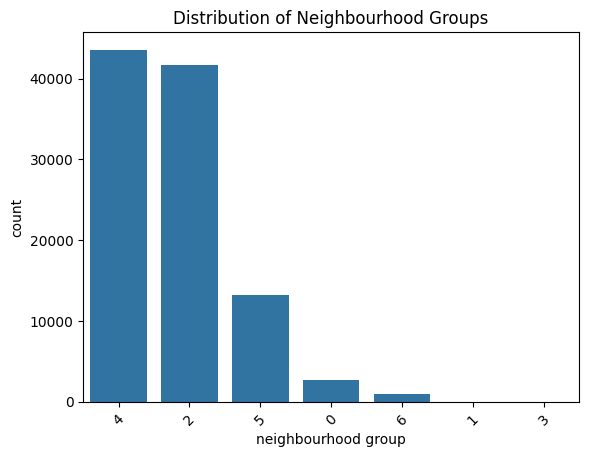

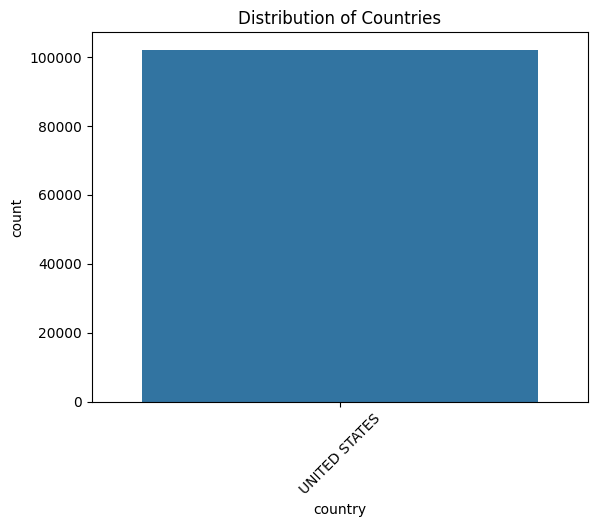

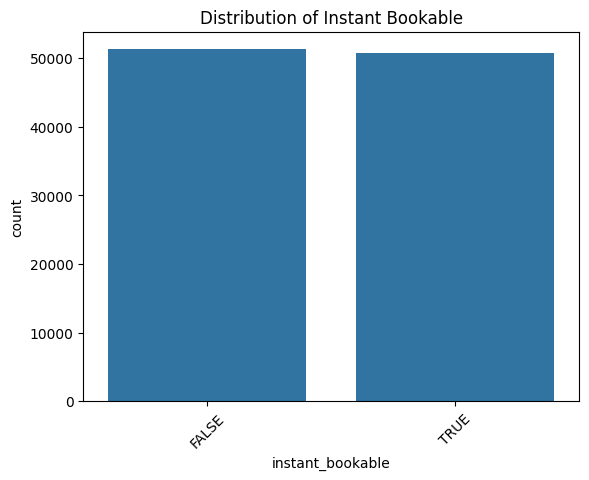

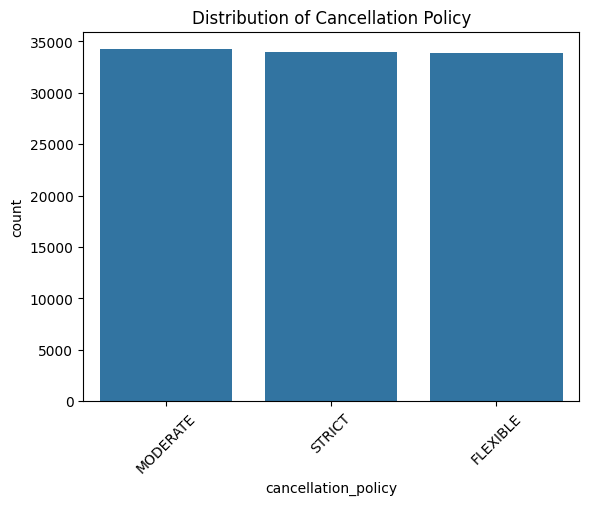

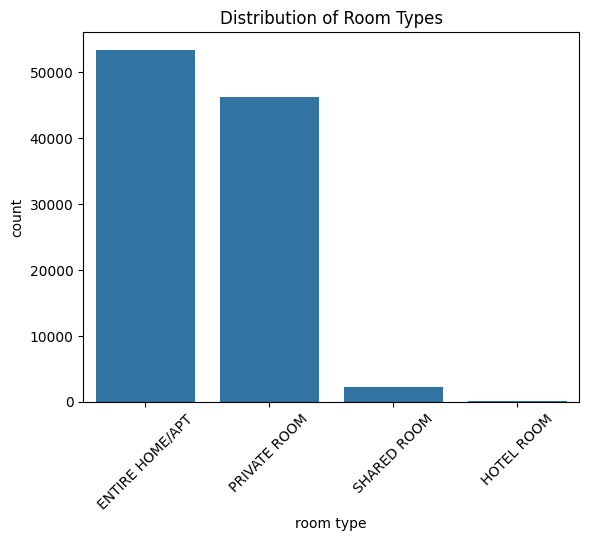

In [273]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='host_identity_verified', order=df['host_identity_verified'].value_counts().index)
plt.title("Distribution of Host Identity Verified")
plt.xticks(rotation=45)
plt.show()



sns.countplot(data=df, x='neighbourhood group', order=df['neighbourhood group'].value_counts().index)
plt.title("Distribution of Neighbourhood Groups")
plt.xticks(rotation=45)
plt.show()


sns.countplot(data=df, x='country', order=df['country'].value_counts().index)
plt.title("Distribution of Countries")
plt.xticks(rotation=45)
plt.show()



sns.countplot(data=df, x='instant_bookable', order=df['instant_bookable'].value_counts().index)
plt.title("Distribution of Instant Bookable")
plt.xticks(rotation=45)
plt.show()



sns.countplot(data=df, x='cancellation_policy', order=df['cancellation_policy'].value_counts().index)
plt.title("Distribution of Cancellation Policy")   
plt.xticks(rotation=45)
plt.show()



sns.countplot(data=df, x='room type', order=df['room type'].value_counts().index)
plt.title("Distribution of Room Types")
plt.xticks(rotation=45)
plt.show()


5

In [274]:
df.to_csv("cleaned_listings_airbnb.csv", index=False)

PART-E

1

these were the following challanges:
->To convert "service fee" into consistent data type. Then i create a function with reg_ex that identifies the distinct patterns in the column and then i just removed those patterns and convert them into a single consistnent format.
->How should i check whether the data is mixed  (num + string ), Then i used (df[column_name].apply(lambda x: type(x)).value_counts()), it basically replaces the value with its data type and counts the values of those data types. So it tells me what data types are mixed in object data type
->while removing near-duplicate Airbnb listings using fuzzy matching.


2
each transformation has its own contrbutions to improve the quality of dataset but these improves alot 
->missing values handling because there were alot of missing values which can be shown via stats
->then outliers handling for minimum nights because it has a lrage number of outliers and would have affected the model very badly.


3
We have almost done feature transformation phase.
As we would be modelling it later so we would do:
->feature selection 
->feature extraction

Bonus